<a href="https://colab.research.google.com/github/deegrayce/useranalytics_telcom/blob/main/Task4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task 4**

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [22]:
telecom_data = pd.read_excel("/content/drive/MyDrive/teleco_excel_file.xlsx")
telecom_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


## **Data Cleaning**

In [23]:
telecom_data.drop(columns =['Nb of sec with 125000B < Vol DL',
                            'Nb of sec with 1250B < Vol UL < 6250B',
                            'Nb of sec with 31250B < Vol DL < 125000B',
                            'Nb of sec with 37500B < Vol UL',
                            'Nb of sec with 6250B < Vol DL < 31250B',
                            'Nb of sec with 6250B < Vol UL < 37500B',
                            'Nb of sec with Vol DL < 6250B',
                            'Nb of sec with Vol UL < 1250B',
                            'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
                            'TCP UL Retrans. Vol (Bytes)'], axis = 1, inplace = True)
telecom_data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
       'Total U

In [14]:
# Renaming columns in telecom_data
telecom_data.rename(columns={
    'Bearer Id': 'Number of xDR sessions',
    'Dur. (ms).1': 'Session duration',
    'Total DL (Bytes)': 'Total DL',
    'Total UL (Bytes)': 'Total UL',
    'Social Media DL (Bytes)': 'Social Media DL',
    'Social Media UL (Bytes)': 'Social Media UL',
    'Youtube DL (Bytes)': 'YouTube DL',
    'Youtube UL (Bytes)': 'YouTube UL',
    'Netflix DL (Bytes)': 'Netflix DL',
    'Netflix UL (Bytes)': 'Netflix UL',
    'Google DL (Bytes)': 'Google DL',
    'Google UL (Bytes)': 'Google UL',
    'Email DL (Bytes)': 'Email DL',
    'Email UL (Bytes)': 'Email UL',
    'Gaming DL (Bytes)': 'Gaming DL',
    'Gaming UL (Bytes)': 'Gaming UL',
    'Other DL (Bytes)': 'Other DL',
    'Other UL (Bytes)': 'Other UL'
}, inplace=True)


## **Task 4**

In [15]:
# Handling missing values by replacing with mean or mode

telecom_data['TCP DL Retrans. Vol (Bytes)'].fillna(telecom_data['TCP DL Retrans. Vol (Bytes)'].median(), inplace=True)
telecom_data['Avg RTT DL (ms)'].fillna(telecom_data['Avg RTT DL (ms)'].median(), inplace=True)

In [24]:
#Aggregate info
# Aggregating, per customer, the following information
experience_metrics = telecom_data.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Handset Type': lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown',
    'Avg Bearer TP DL (kbps)': 'mean'
}).reset_index()


# Display first few rows of the aggregated data
print(experience_metrics.head())


   MSISDN/Number  TCP DL Retrans. Vol (Bytes)  Avg RTT DL (ms)  \
0   3.360100e+10                          NaN             46.0   
1   3.360100e+10                          NaN             30.0   
2   3.360100e+10                          NaN              NaN   
3   3.360101e+10                       1066.0             69.0   
4   3.360101e+10                    9349630.0             57.0   

                     Handset Type  Avg Bearer TP DL (kbps)  
0  Huawei P20 Lite Huawei Nova 3E                     37.0  
1          Apple iPhone 7 (A1778)                     48.0  
2                       undefined                     48.0  
3         Apple iPhone 5S (A1457)                    204.0  
4         Apple iPhone Se (A1723)                  20197.5  


In [17]:
# Finding top, bottom and most frequent values
def top_bottom_freq_values(column):
    return {
        'Top 10': column.nlargest(10).tolist(),
        'Bottom 10': column.nsmallest(10).tolist(),
        'Most Frequent': column.mode().tolist()
    }

# Compute top, bottom and most frequent values
top_bottom_freq_tcp = top_bottom_freq_values(telecom_data['TCP DL Retrans. Vol (Bytes)'])
top_bottom_freq_rtt = top_bottom_freq_values(telecom_data['Avg RTT DL (ms)'])
top_bottom_freq_throughput = top_bottom_freq_values(telecom_data['Avg Bearer TP DL (kbps)'])

print("Top, Bottom and Most Frequent TCP values:", top_bottom_freq_tcp)
print("\nTop, Bottom and Most Frequent RTT values:", top_bottom_freq_rtt)
print("\nTop, Bottom and Most Frequent Throughput values:", top_bottom_freq_throughput)


Top, Bottom and Most Frequent TCP values: {'Top 10': [4294425570.0, 4291380336.0, 4289876615.0, 4289487601.0, 4288060364.0, 4275259349.0, 4268431996.0, 4259996826.0, 4256650017.0, 4254643827.0], 'Bottom 10': [2.0, 2.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0], 'Most Frequent': [568730.0]}

Top, Bottom and Most Frequent RTT values: {'Top 10': [96923.0, 64640.0, 55811.0, 54847.0, 26971.0, 26250.0, 25873.0, 25602.0, 25374.0, 24733.0], 'Bottom 10': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0], 'Most Frequent': [45.0]}

Top, Bottom and Most Frequent Throughput values: {'Top 10': [378160.0, 299257.0, 299002.0, 276040.0, 269362.0, 266332.0, 265440.0, 264448.0, 263047.0, 254253.0], 'Bottom 10': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Most Frequent': [23.0]}


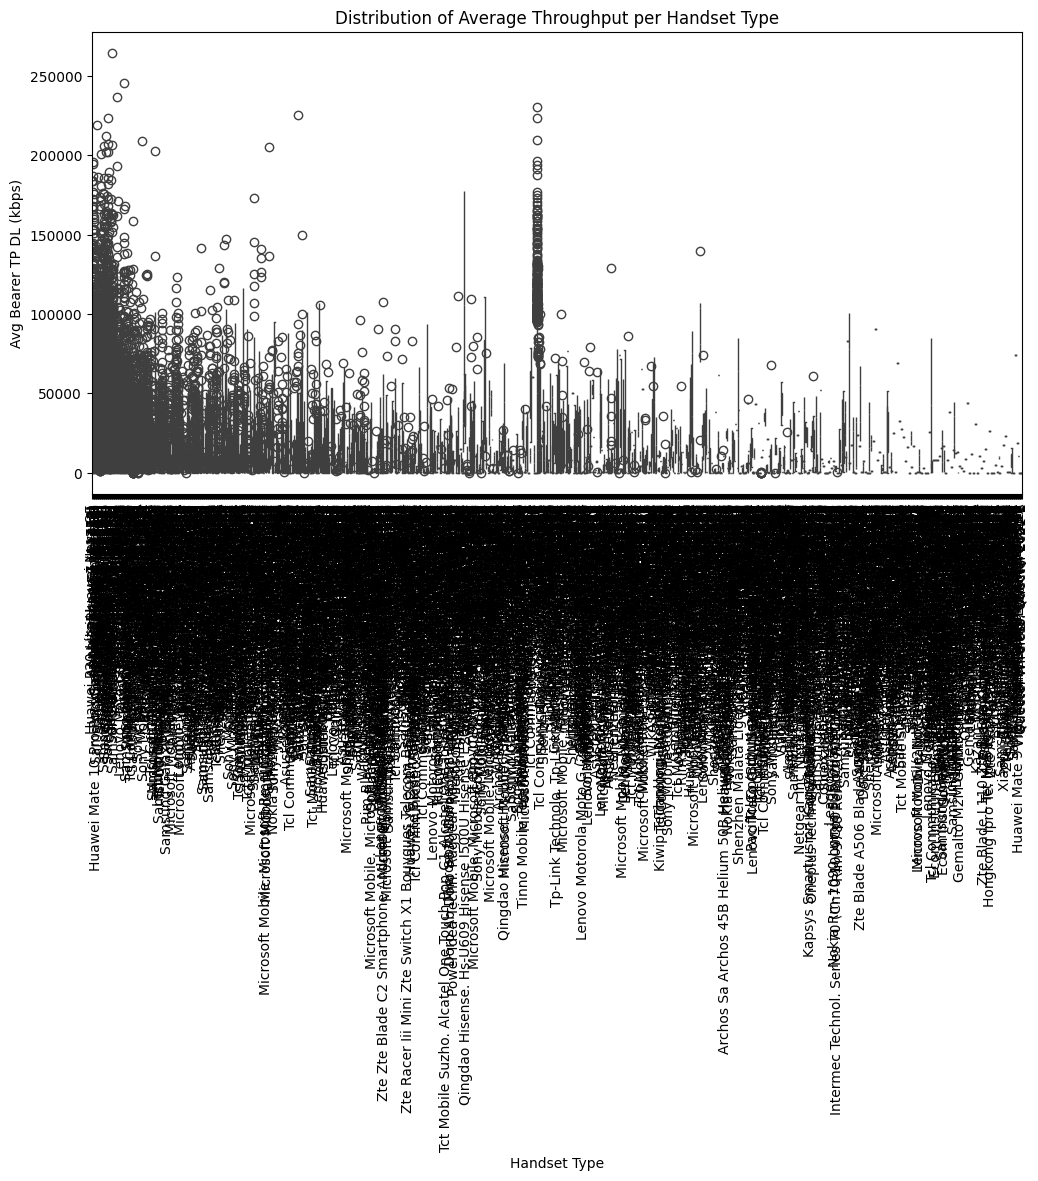

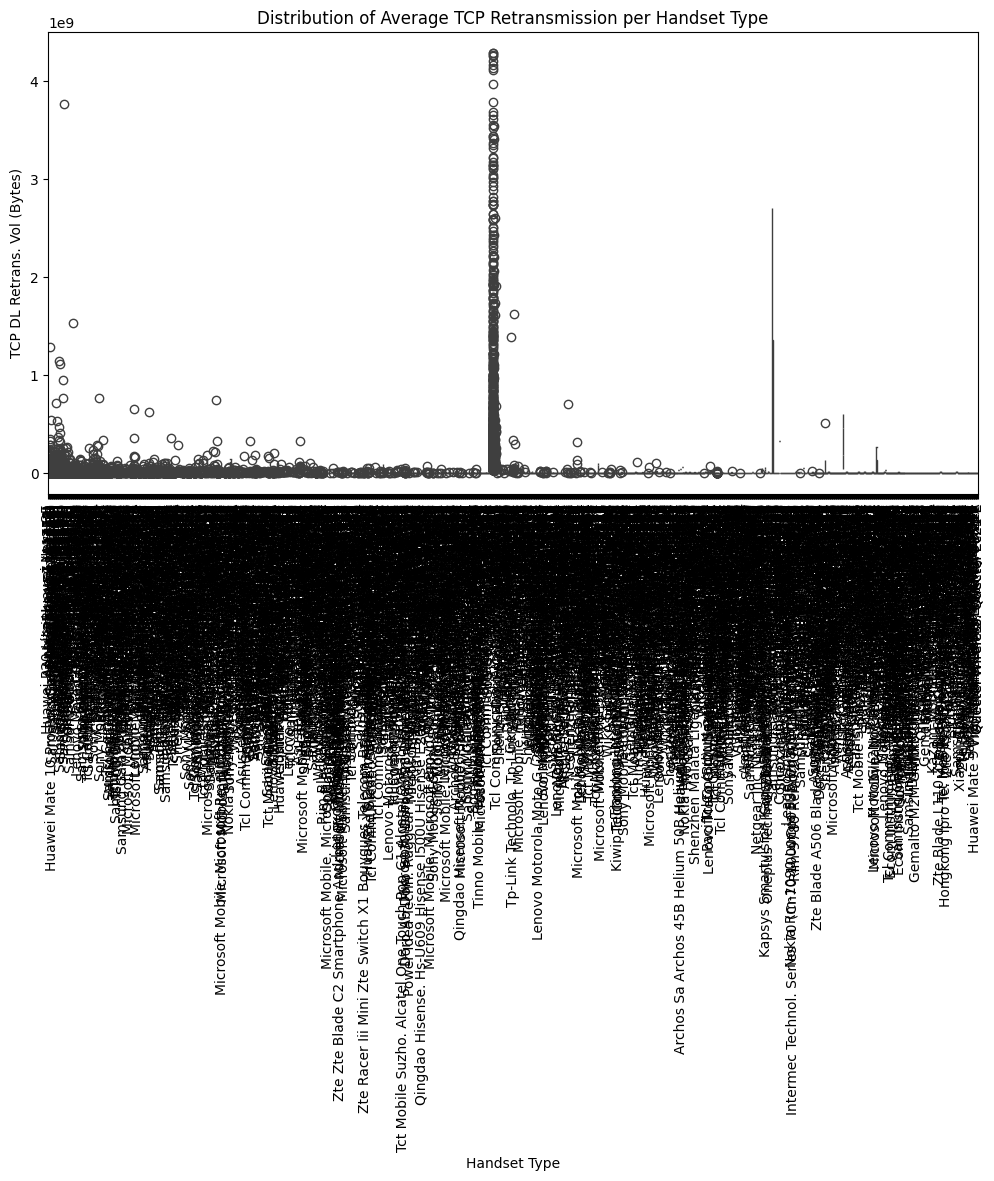

In [18]:
# Distribution of average throughput per handset type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Handset Type', y='Avg Bearer TP DL (kbps)', data=experience_metrics)
plt.title('Distribution of Average Throughput per Handset Type')
plt.xticks(rotation=90)
plt.show()

# Distribution of average TCP retransmission per handset type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Handset Type', y='TCP DL Retrans. Vol (Bytes)', data=experience_metrics)
plt.title('Distribution of Average TCP Retransmission per Handset Type')
plt.xticks(rotation=90)
plt.show()


In [1]:
from sklearn.cluster import KMeans

# numeric data for clustering
#cluster_data = experience_metrics[['TCP DL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg Bearer TP DL (kbps)']]

#cluster_data = experience_metrics[['TCP DL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg Bearer TP DL (kbps)', 'Cluster']]


# Performing k-means clustering
#kmeans = KMeans(n_clusters=3)
#experience_metrics['Cluster'] = kmeans.fit_predict(cluster_data)

#adding the cluster column
#cluster_data = experience_metrics[['TCP DL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg Bearer TP DL (kbps)', 'Cluster']]

# Describing each cluster by mean
#cluster_descriptions = cluster_data.groupby('Cluster').mean().reset_index()
#print(cluster_descriptions)

## **Task 5 : Satisfaction Analysis**